 ## 11. Solid Geometry

In [1]:
from operator import add
from sympy import (
    cos,
    pi,
    sin,
    symbols
)
from sympy.geometry import (
    Line,
    Point,
    Ray
)
from sympy.plotting import (
    plot3d,
    plot3d_parametric_surface
)
from sympy.plotting.plot import unset_show

import numpy as np
import matplotlib.colors as col
import matplotlib.pyplot as plt

 > In all these respects . . .

 - any rigid motion of space is a composite of rotations, translations & reflections
 - all the rotations about a point 0 form a group
 - orientation in 3-dimensional spae can be described with only 2 orientations

 > . . . three dimensions is much like two dimensions - but there are important points of difference, such as the much greater variety of figures in 3-space: Spheres, cylinders, pyramids, regular solids, irregular solids, and the like.
 > Decisive new notions, such as the Gaussian curvature of a surface at a point, arise from the study of these figure . . .

In [2]:
c_start = col.ColorConverter.to_rgba('blue', alpha=.2)
c_end = col.ColorConverter.to_rgba('yellow', alpha=.2)

cmap_rb = col.LinearSegmentedColormap.from_list(
    'rb_cmap',
    [c_start, c_end],
    512
)

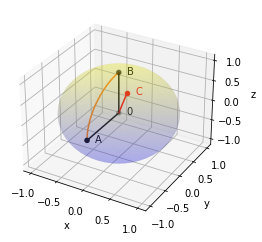

In [3]:
u, v = symbols('u, v')

p1 = plot3d_parametric_surface(
    (
        sin(u)*cos(v),
        sin(u)*sin(v),
        cos(u),
        (u, 0, pi),
        (v, 0, 2*pi)
    ),
    show=False,
    nb_of_points_u=100,
    nb_of_points_y=100
)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

backend = p1.backend(p1)
backend.ax = ax
backend._process_series(backend.parent._series, ax, backend.parent)

plt.close(backend.fig)
ax.collections[0].set_cmap(cmap_rb)

p0 = Point(0, 0, 0)
pA = Point(0, -1, 0)
pB = Point(0, 0, 1)

theta = pi/4
rR = theta + (theta/2)
phi = pi/4
rS = (2 * pi) - (phi/2)
pC = Point(
    cos(rR) * cos(rS),
    sin(rR) * sin(rS),
    sin(rR) * cos(rS)
)

offset1 = (.15, 0, 0)

ax.scatter(*list(zip(p0, pA, pB)), c='k')
ax.scatter(*pC, c='r')
ax.text(*list(map(add, offset1, p0)), '0')
ax.text(*list(map(add, offset1, pA)), 'A')
ax.text(*list(map(add, offset1, pB)), 'B')
ax.text(*list(map(add, offset1, pC)), 'C', c='r')
ax.plot(*list(zip(p0, pA)), c='k')
ax.plot(*list(zip(p0, pB)), c='k')
ax.plot(*list(zip(p0, pC)), c='r')

piN = float(pi)
x = np.linspace(0, 0, 100)
z, y = zip(*[(cos(a), sin(a)) for a in np.linspace(piN+(piN/2), 2*piN, 100)])

AB = x, y, z
ax.plot(*AB, label='parametric curve')

plt.show()

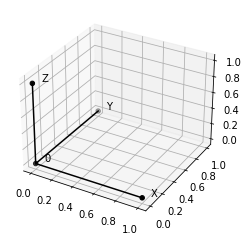

In [5]:
pX = Point(1, 0, 0)
pY = Point(0, 1, 0)
pZ = Point(0, 0, 1)

rX = Ray(p0, pX)
rY = Ray(p0, pY)
rZ = Ray(p0, pZ)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

offset2 = (.05, .05, 0)

ax.scatter(*list(zip(p0, pX, pY, pZ)), c='k')
ax.text(*list(map(add, offset2, p0)), '0')
ax.text(*list(map(add, offset2, pX)), 'X')
ax.text(*list(map(add, offset2, pY)), 'Y')
ax.text(*list(map(add, offset2, pZ)), 'Z')
ax.plot(*list(zip(p0, pX)), c='k')
ax.plot(*list(zip(p0, pY)), c='k')
ax.plot(*list(zip(p0, pZ)), c='k')

plt.show()

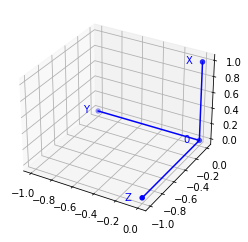

In [6]:
pXp = Point(0, 0, 1)
pYp = Point(-1, 0, 0)
pZp = Point(0, -1, 0)

rXp = Ray(p0, pXp)
rYp = Ray(p0, pYp)
rZp = Ray(p0, pZp)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

offset3 = (-.1, -.1, 0)

ax.scatter(*list(zip(p0, pXp, pYp, pZp)), c='b')
ax.text(*list(map(add, offset3, p0)), '0', c='b')
ax.text(*list(map(add, offset3, pXp)), 'X', c='b')
ax.text(*list(map(add, offset3, pYp)), 'Y', c='b')
ax.text(*list(map(add, offset3, pZp)), 'Z', c='b')
ax.plot(*list(zip(p0, pXp)), c='b')
ax.plot(*list(zip(p0, pYp)), c='b')
ax.plot(*list(zip(p0, pZp)), c='b')

plt.show()

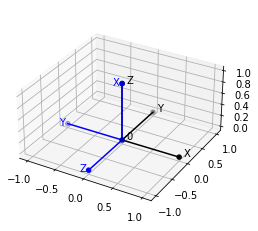

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(*list(zip(p0, pX, pY, pZ)), c='k')
ax.scatter(*list(zip(p0, pXp, pYp, pZp)), c='b')
ax.text(*list(map(add, offset2, p0)), '0')
ax.text(*list(map(add, offset2, pX)), 'X')
ax.text(*list(map(add, offset2, pY)), 'Y')
ax.text(*list(map(add, offset2, pZ)), 'Z')
ax.plot(*list(zip(p0, pX)), c='k')
ax.plot(*list(zip(p0, pY)), c='k')
ax.plot(*list(zip(p0, pZ)), c='k')
ax.text(*list(map(add, offset3, pXp)), 'X', c='b')
ax.text(*list(map(add, offset3, pYp)), 'Y', c='b')
ax.text(*list(map(add, offset3, pZp)), 'Z', c='b')
ax.plot(*list(zip(p0, pXp)), c='b')
ax.plot(*list(zip(p0, pYp)), c='b')
ax.plot(*list(zip(p0, pZp)), c='b')
ax.set_box_aspect([1, 1, .5])

plt.show()

In [33]:
def checkOrientation(A, B):
    dots = [x.dot(y) for (x, y) in zip(A, B)]
    return all([dot==0 for dot in dots])


checkOrientation((pX, pY, pZ), (pXp, pYp, pZp))

True

In [34]:
checkOrientation((pX, pY, pZ), (pX, pY, Point(0, 0, -1)))

False

In [36]:
checkOrientation((pX, pY, pZ), (pY, pZ, pX))

True

In [37]:
checkOrientation((pX, pY, pZ), (pY, pX, pZ))

False